In [1]:
import pandas as pd
import datetime 
import holidays
from collections import ChainMap
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
# Helpers to format and locate ticks for dates
from matplotlib.dates import DateFormatter, DayLocator
import matplotlib.dates as mdates
from pmdarima.arima import auto_arima
from pmdarima.arima import ADFTest

In [2]:
data_cleaned=pd.read_csv("dati_con_fest.csv", index_col=0, parse_dates=True, squeeze=True)
data_cleaned["Date"]= pd.to_datetime(data_cleaned["Date"])
series1=pd.DataFrame({'x_values': data_cleaned["Date"], 'y_values': data_cleaned["Vendite_1"]})
series1=series1.set_index("x_values")
train=series1[:1302] #5/6 del dataset per tenere conto del covid
test=series1[1302:1563] #1/6 del dataset


In [4]:
import pmdarima as pm

m1 = pm.auto_arima(train,start_p=0,d=1,start_q=0,max_p=5,max_d=5,max_q=5,
                      start_P=0,D=1,start_Q=0,max_P=5,max_D=5,max_Q=5,
                      m=7,seasonal=True, error_action="warn",trace=True,supress_warnings=True,
                      stepwise=True,random_state=20,n_fits=50
                      )

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=22852.906, Time=0.12 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=22424.824, Time=3.94 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=22020.034, Time=8.69 sec
 ARIMA(0,1,1)(0,1,0)[7]             : AIC=inf, Time=0.83 sec
 ARIMA(0,1,1)(1,1,1)[7]             : AIC=22017.226, Time=12.34 sec
 ARIMA(0,1,1)(1,1,0)[7]             : AIC=22238.962, Time=5.24 sec
 ARIMA(0,1,1)(2,1,1)[7]             : AIC=22019.226, Time=21.06 sec
 ARIMA(0,1,1)(1,1,2)[7]             : AIC=inf, Time=28.96 sec
 ARIMA(0,1,1)(0,1,2)[7]             : AIC=22017.191, Time=14.39 sec
 ARIMA(0,1,1)(0,1,3)[7]             : AIC=22019.166, Time=33.69 sec
 ARIMA(0,1,1)(1,1,3)[7]             : AIC=inf, Time=53.29 sec
 ARIMA(0,1,0)(0,1,2)[7]             : AIC=22304.888, Time=11.29 sec
 ARIMA(1,1,1)(0,1,2)[7]             : AIC=21922.996, Time=19.01 sec
 ARIMA(1,1,1)(0,1,1)[7]             : AIC=21931.311, Time=17.87 sec
 ARIMA(1,1,1)(1,1,2)[7]     

In [6]:
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                 1302
Model:             SARIMAX(5, 1, 1)x(0, 1, 1, 7)   Log Likelihood              -10948.620
Date:                           Thu, 01 Jul 2021   AIC                          21913.239
Time:                                   13:38:39   BIC                          21954.563
Sample:                                        0   HQIC                         21928.748
                                          - 1302                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0168      0.054     -0.313      0.755      -0.122       0.089
ar.L2         -0.2591      0.035     -7.503      0.000      -0.327      -0.191
ar.L3         -0.2188      0.032     -6.903      0.000      -0.281      -0.157
ar.L4         -0.1837      0.031     -5.918      0.000      -0.245      -0.123
ar.L5         -0.1645      0.033     -5.004      0.000      -0.229      -0.100
ma.L1         -0.5194      0.054     -9.635      0.000      -0.625      -0.414
ma.S.L7       -0.8297      0.015    -54.597      0.000      -0.859      -0.800
sigma2      1.287e+06   2.71e+04     47.466      0.000    1.23e+06    1.34e+06
===================================================================================
Ljung-Box (Q):                       42.81   Jarque-Bera (JB):              2110.23
Prob(Q):                              0.35   Prob(JB):                         0.00
Heteroskedasticity (H):               0.83   Skew:                             0.16
Prob(H) (two-sided):                  0.05   Kurtosis:                         9.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

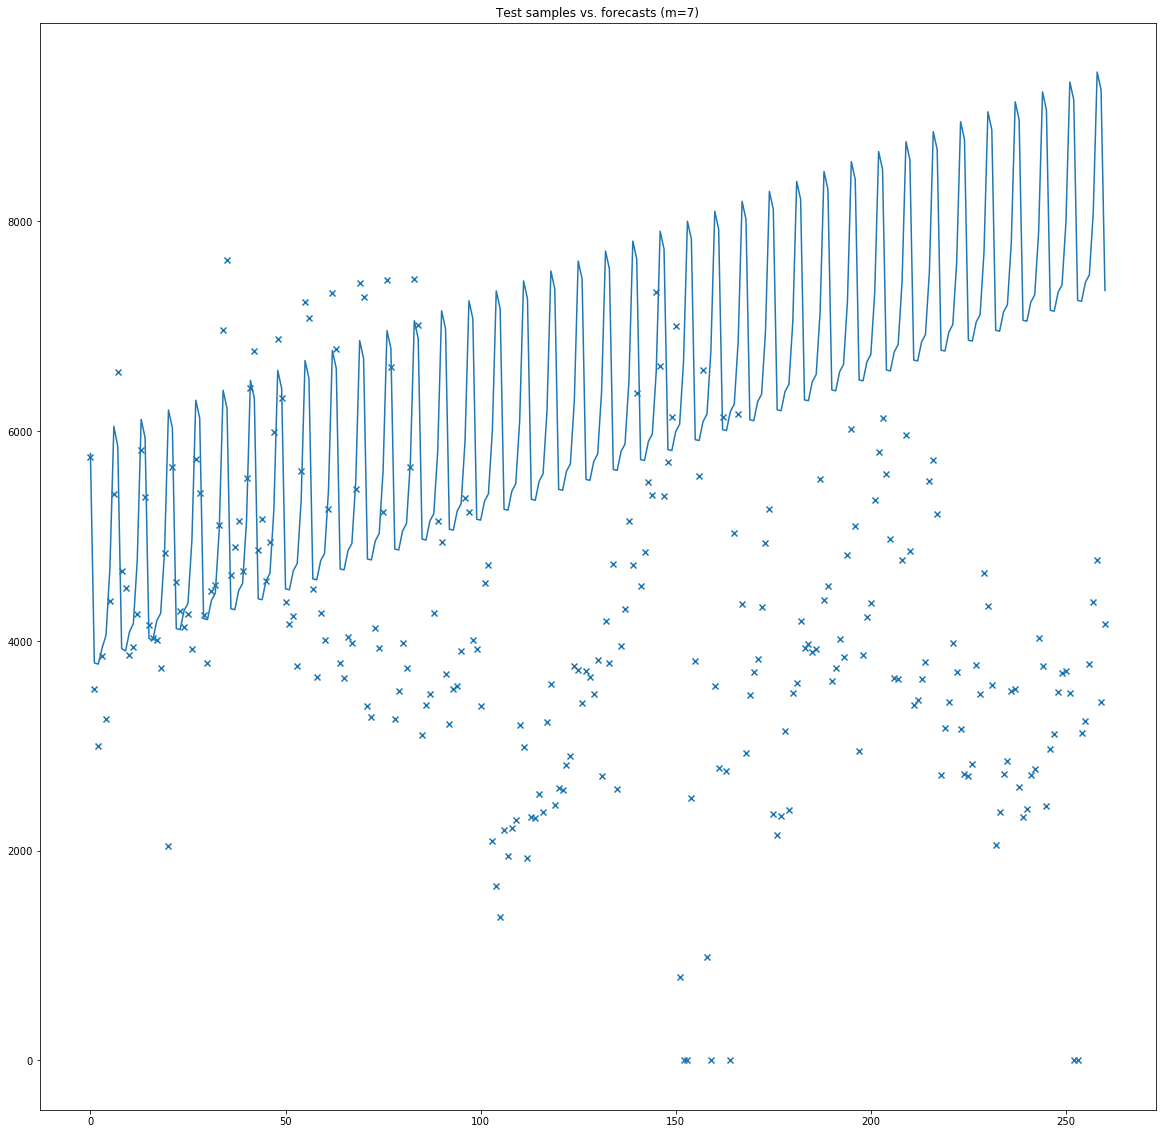

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
x = np.arange(test.shape[0])

# Plot m=1
plt.scatter(x, test, marker='x')
plt.plot(x, m1.predict(n_periods=test.shape[0]))
plt.title('Test samples vs. forecasts (m=7)')

plt.show()

In [17]:
prediction=pd.DataFrame(m1.predict(n_periods=261), index=test.index)
prediction.columns=["predicted_sales"]
prediction

,predicted_sales
x_values,
2020-07-26,5787.561216
2020-07-27,3790.450517
2020-07-28,3778.847767
2020-07-29,3932.931595
2020-07-30,4055.797192
...,...
2021-04-08,7489.965554
2021-04-09,8086.588904
2021-04-10,9424.786792


C:\Users\Lilia\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


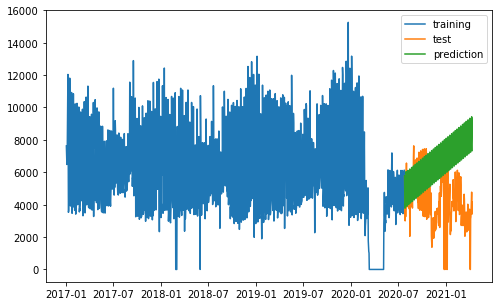

In [18]:
plt.figure(figsize=(8,5))

plt.plot(train,label="training")
plt.plot(test,label="test")
plt.plot(prediction,label="prediction")

plt.legend(loc="best")
plt.show()